In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


# Parameters
true_mean = 10
true_sd = 2
sample_sizes = [5, 10, 20, 40, 80, 160, 1000]
confidence_level = 0.95
alpha = 1 - confidence_level

In [3]:
# Print results
for i, n in enumerate(sample_sizes):
print(f"\nSample size = {n}")
for method, intervals in results.items():
print(f" {method}: {intervals[i]}")


# -----------------------------
# Plotting the confidence intervals (all methods vs. n)
# -----------------------------
plt.figure(figsize=(10, 6))
methods = list(results.keys())
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]


for m_idx, method in enumerate(methods):
lowers = [ci[0] for ci in results[method]]
uppers = [ci[1] for ci in results[method]]
means = [(lo + up)/2 for lo, up in results[method]]


plt.errorbar(sample_sizes, means,
yerr=[np.array(means)-np.array(lowers), np.array(uppers)-np.array(means)],
fmt="o--", capsize=5, color=colors[m_idx], label=method)


plt.axhline(true_mean, color="black", linestyle="--", label="True mean")
plt.xscale("log")
plt.xlabel("Sample size (log scale)")
plt.ylabel("Mean ± 95% Interval")
plt.title("Confidence / Credible Intervals by Method")
plt.legend()
plt.tight_layout()
plt.show()


# -----------------------------
# Subplots: Each sample size, overlay all methods
# -----------------------------
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()


for i, n in enumerate(sample_sizes):
ax = axes[i]
for m_idx, method in enumerate(methods):
lo, up = results[method][i]
mean_val = (lo + up) / 2
ax.errorbar(m_idx, mean_val,
yerr=[[mean_val - lo], [up - mean_val]],
fmt="o", capsize=5, color=colors[m_idx], label=method if i == 0 else "")
ax.axhline(true_mean, color="black", linestyle="--")
ax.set_title(f"n = {n}")
ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods, rotation=45, ha="right")


plt.suptitle("Comparison of Methods Across Sample Sizes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# -----------------------------
# Histograms of bootstrap distributions for small and large n
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


for ax, n in zip(axes, [5, 1000]):
boot_means = bootstrap_distributions[n]
ax.hist(boot_means, bins=30, color="tab:green", alpha=0.7, edgecolor="black")
ax.axvline(true_mean, color="black", linestyle="--", label="True mean")
ax.set_title(f"Bootstrap distribution of means (n = {n})")
ax.set_xlabel("Sample mean")
ax.set_ylabel("Frequency")
ax.legend()


plt.tight_layout()
plt.show()

IndentationError: expected an indented block after 'for' statement on line 2 (554402239.py, line 3)


Sample size = 5
  Z (known sigma): (np.float64(7.208690530854955), np.float64(10.71478069316128))
  T (unknown sigma): (np.float64(7.253571501769423), np.float64(10.669899722246813))
  Bootstrap: (np.float64(7.866180799504063), np.float64(10.007715784923352))
  Bayesian: (np.float64(7.208690530854955), np.float64(10.71478069316128))

Sample size = 10
  Z (known sigma): (np.float64(8.859061454706149), np.float64(11.338241583924395))
  T (unknown sigma): (np.float64(9.15732914323757), np.float64(11.039973895392974))
  Bootstrap: (np.float64(9.258337551750337), np.float64(10.79581190369956))
  Bayesian: (np.float64(8.859061454706149), np.float64(11.338241583924395))

Sample size = 20
  Z (known sigma): (np.float64(8.601763464407702), np.float64(10.354808545560866))
  T (unknown sigma): (np.float64(8.529040135489971), np.float64(10.427531874478596))
  Bootstrap: (np.float64(8.56227905043715), np.float64(10.322686024657827))
  Bayesian: (np.float64(8.601763464407702), np.float64(10.3548085

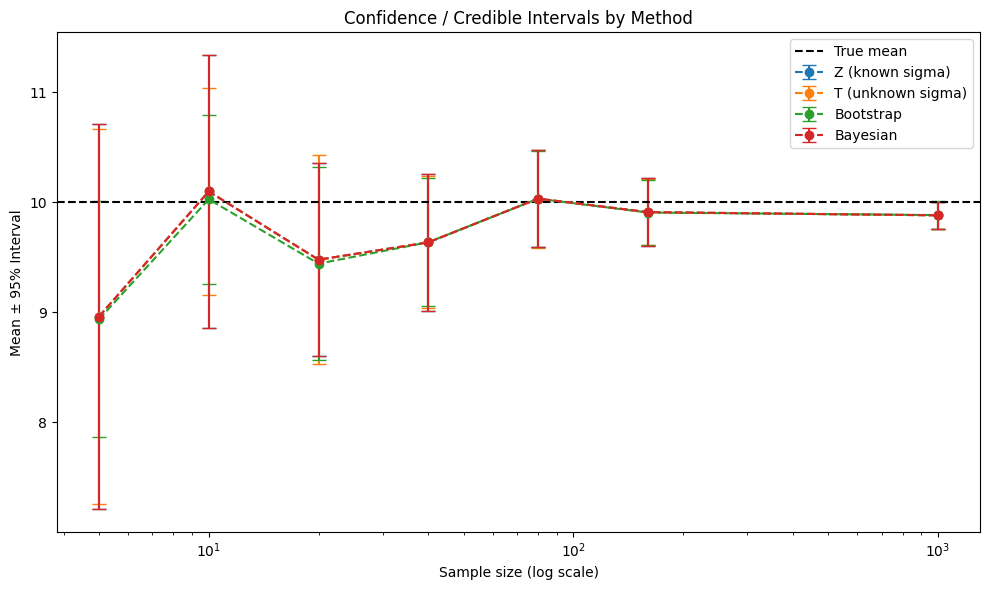

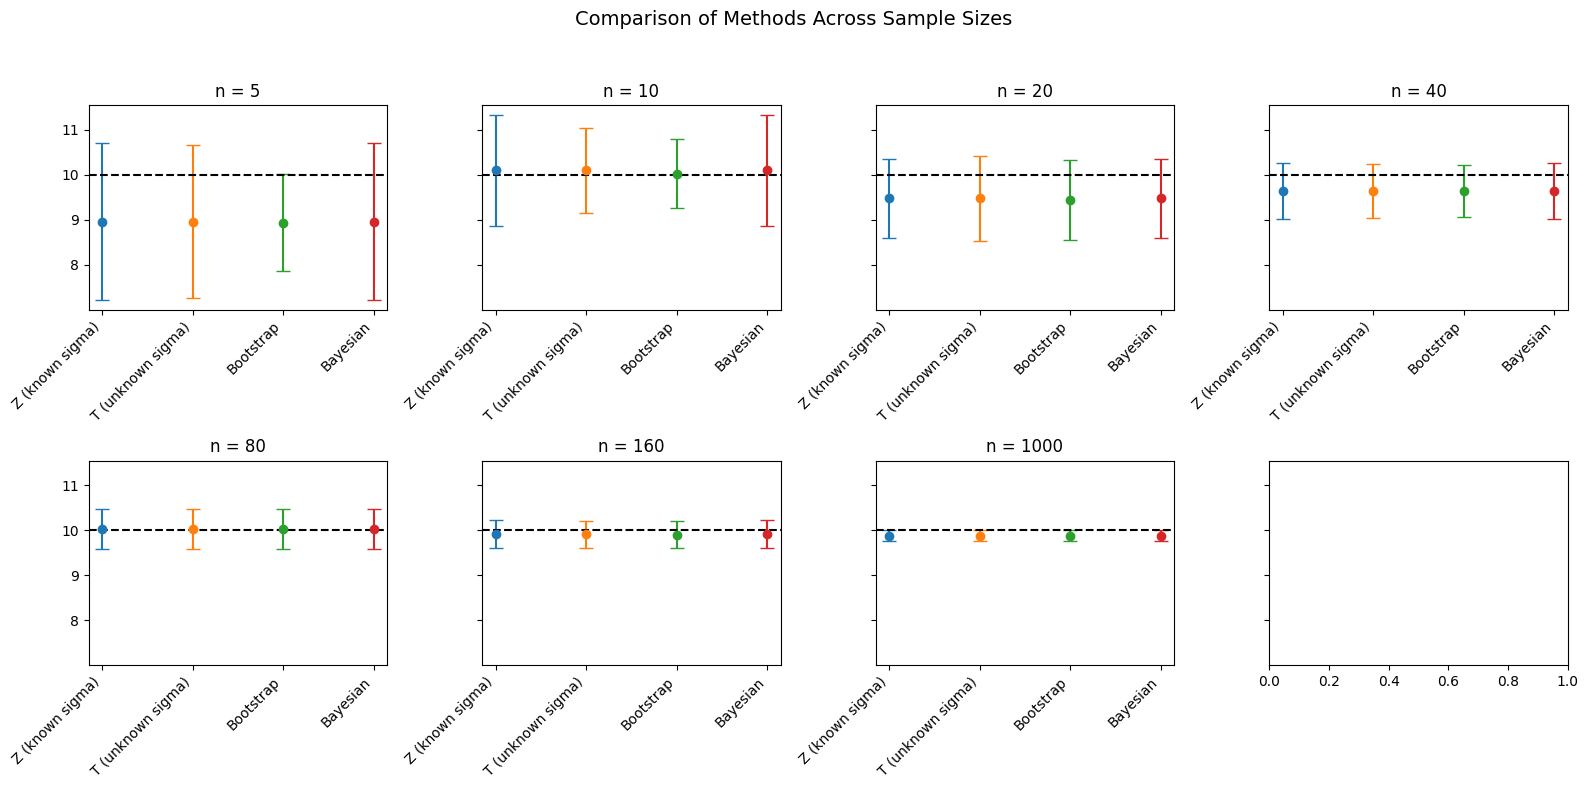

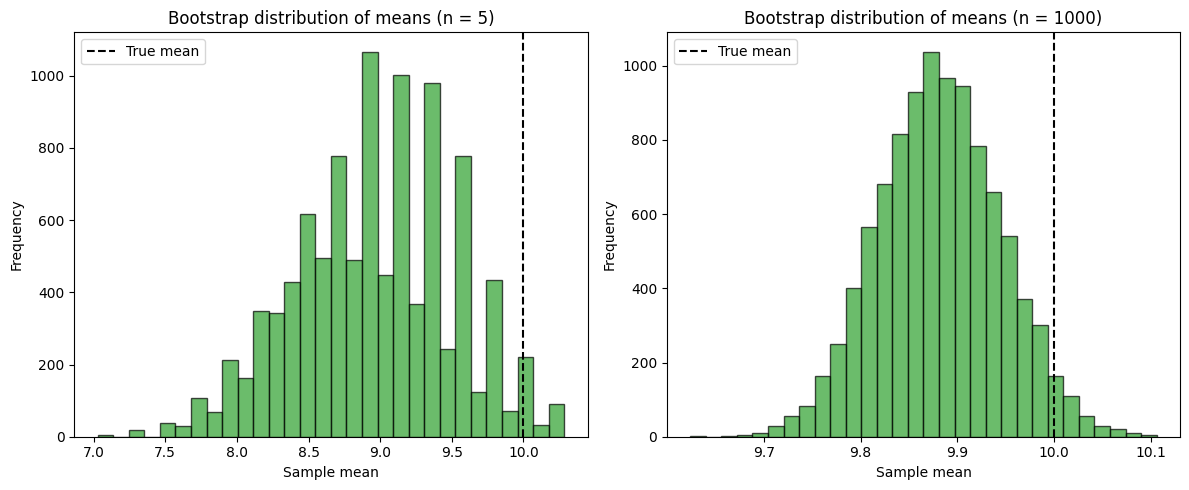

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Parameters
true_mean = 10
true_sd = 2
sample_sizes = [5, 10, 20, 40, 80, 160, 1000]
confidence_level = 0.95
alpha = 1 - confidence_level

# -----------------------------
# Method 1: Large n and/or known sigma (Z-score)
# -----------------------------
def ci_z(sample_mean, n, sigma, alpha=0.05):
    z = st.norm.ppf(1 - alpha/2)
    sem = sigma / np.sqrt(n)
    return sample_mean - z*sem, sample_mean + z*sem

# -----------------------------
# Method 2: Small n, unknown sigma (T-distribution)
# -----------------------------
def ci_t(data, alpha=0.05):
    n = len(data)
    sample_mean = np.mean(data)
    sample_sd = np.std(data, ddof=1)
    sem = sample_sd / np.sqrt(n)
    t_val = st.t.ppf(1 - alpha/2, df=n-1)
    return sample_mean - t_val*sem, sample_mean + t_val*sem

# -----------------------------
# Method 3: Bootstrap confidence intervals
# -----------------------------
def ci_bootstrap(data, n_boot=10000, alpha=0.05):
    n = len(data)
    boot_means = []
    for _ in range(n_boot):
        resample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(resample))
    lower = np.percentile(boot_means, 100*alpha/2)
    upper = np.percentile(boot_means, 100*(1 - alpha/2))
    return lower, upper, boot_means

# -----------------------------
# Method 4: Bayesian credible interval (flat prior, same form as Z)
# -----------------------------
def ci_bayesian(sample_mean, n, sigma, alpha=0.05):
    sem = sigma / np.sqrt(n)
    z = st.norm.ppf(1 - alpha/2)
    return sample_mean - z*sem, sample_mean + z*sem

# Run simulation and collect results
results = {"Z (known sigma)": [], "T (unknown sigma)": [], "Bootstrap": [], "Bayesian": []}
bootstrap_distributions = {}

for n in sample_sizes:
    data = np.random.normal(true_mean, true_sd, n)
    sample_mean = np.mean(data)

    results["Z (known sigma)"].append(ci_z(sample_mean, n, true_sd, alpha))
    results["T (unknown sigma)"].append(ci_t(data, alpha))
    ci3 = ci_bootstrap(data, alpha=alpha)
    results["Bootstrap"].append((ci3[0], ci3[1]))
    bootstrap_distributions[n] = ci3[2]  # store resample means
    results["Bayesian"].append(ci_bayesian(sample_mean, n, true_sd, alpha))

# Print results
for i, n in enumerate(sample_sizes):
    print(f"\nSample size = {n}")
    for method, intervals in results.items():
        print(f"  {method}: {intervals[i]}")

# -----------------------------
# Plotting the confidence intervals (all methods vs. n)
# -----------------------------
plt.figure(figsize=(10, 6))
methods = list(results.keys())
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for m_idx, method in enumerate(methods):
    lowers = [ci[0] for ci in results[method]]
    uppers = [ci[1] for ci in results[method]]
    means = [(lo + up)/2 for lo, up in results[method]]

    plt.errorbar(sample_sizes, means, 
                 yerr=[np.array(means)-np.array(lowers), np.array(uppers)-np.array(means)],
                 fmt="o--", capsize=5, color=colors[m_idx], label=method)

plt.axhline(true_mean, color="black", linestyle="--", label="True mean")
plt.xscale("log")
plt.xlabel("Sample size (log scale)")
plt.ylabel("Mean ± 95% Interval")
plt.title("Confidence / Credible Intervals by Method")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Subplots: Each sample size, overlay all methods
# -----------------------------
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    ax = axes[i]
    for m_idx, method in enumerate(methods):
        lo, up = results[method][i]
        mean_val = (lo + up) / 2
        ax.errorbar(m_idx, mean_val, 
                    yerr=[[mean_val - lo], [up - mean_val]],
                    fmt="o", capsize=5, color=colors[m_idx], label=method if i == 0 else "")
    ax.axhline(true_mean, color="black", linestyle="--")
    ax.set_title(f"n = {n}")
    ax.set_xticks(range(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha="right")

plt.suptitle("Comparison of Methods Across Sample Sizes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------
# Histograms of bootstrap distributions for small and large n
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, n in zip(axes, [5, 1000]):
    boot_means = bootstrap_distributions[n]
    ax.hist(boot_means, bins=30, color="tab:green", alpha=0.7, edgecolor="black")
    ax.axvline(true_mean, color="black", linestyle="--", label="True mean")
    ax.set_title(f"Bootstrap distribution of means (n = {n})")
    ax.set_xlabel("Sample mean")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()


Confidence/Credible intervals (95%) for data from N(mu=10.0, sd=2.0)

n =    5 | sample mean =  10.9180
    Z (known sigma)   : [ 9.1650, 12.6711]
    T (unknown sigma) : [ 9.1592, 12.6768]
    Bootstrap         : [ 9.9008, 12.0314]
    Bayesian          : [ 9.1650, 12.6711]
------------------------------------------------------------------------
n =   10 | sample mean =  10.3340
    Z (known sigma)   : [ 9.0944, 11.5736]
    T (unknown sigma) : [ 9.2908, 11.3773]
    Bootstrap         : [ 9.5359, 11.2504]
    Bayesian          : [ 9.0944, 11.5736]
------------------------------------------------------------------------
n =   20 | sample mean =  10.5122
    Z (known sigma)   : [ 9.6357, 11.3888]
    T (unknown sigma) : [ 9.7610, 11.2635]
    Bootstrap         : [ 9.8632, 11.2365]
    Bayesian          : [ 9.6357, 11.3888]
------------------------------------------------------------------------
n =   40 | sample mean =   9.5667
    Z (known sigma)   : [ 8.9469, 10.1865]
    T (unknown s

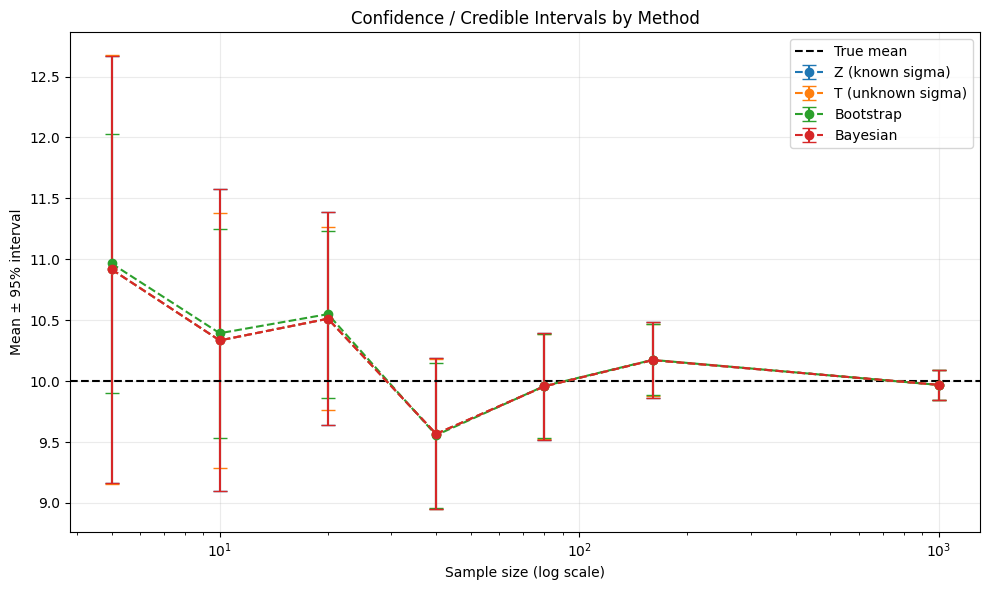

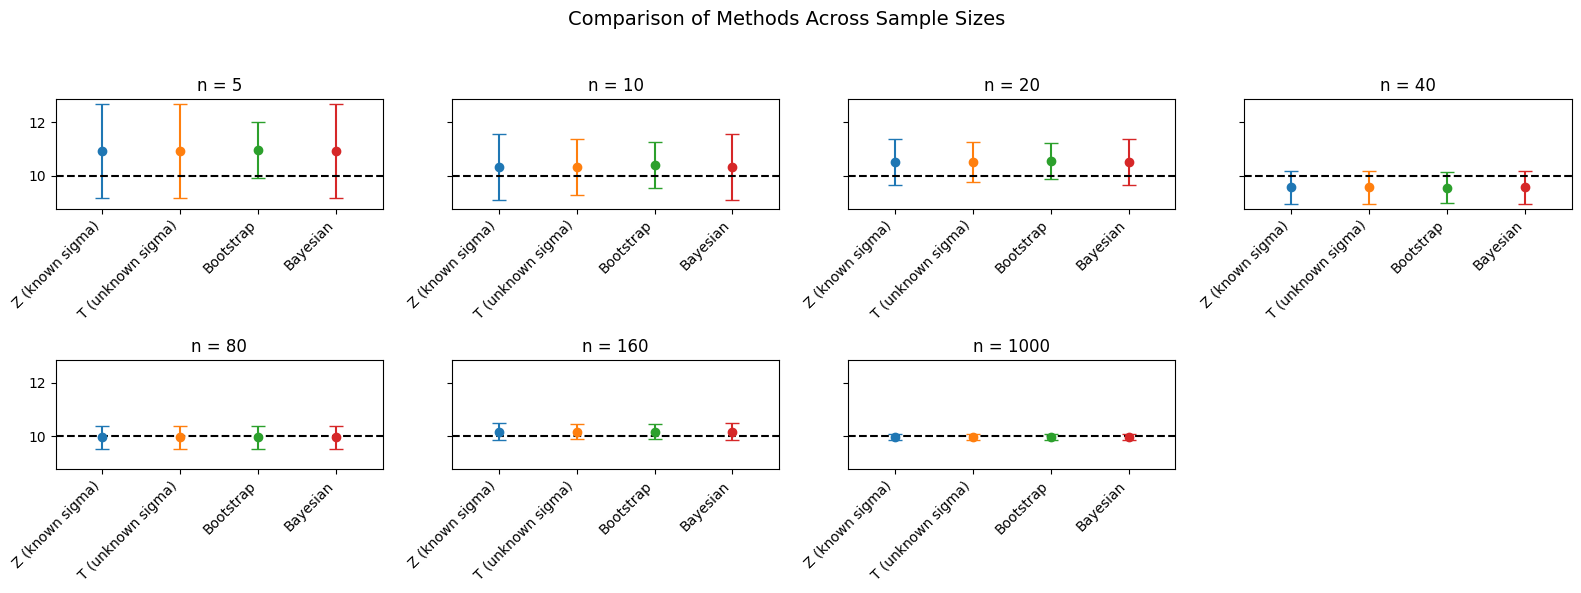

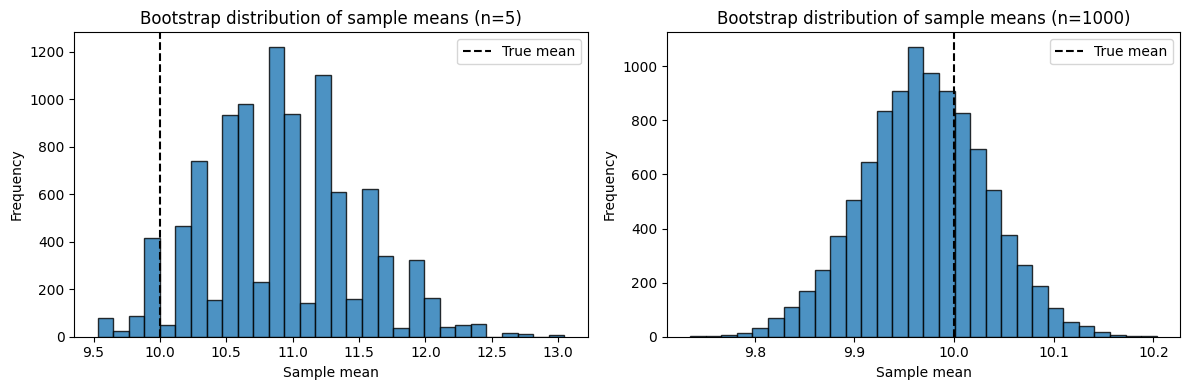

In [5]:
# Confidence / Credible Intervals: 4 methods + plotting
# Run in Jupyter Lab. Python 3.x required. Dependencies: numpy, scipy, matplotlib

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# --- Parameters --------------------------------------------------------------
true_mean = 10.0      # mu
true_sd   = 2.0       # theta (population SD)
sample_sizes = [5, 10, 20, 40, 80, 160, 1000]
confidence_level = 0.95
alpha = 1.0 - confidence_level
n_boot = 10000        # bootstrap resamples

# -----------------------------
# Method 1: Large n and/or known sigma (Z-score)
# -----------------------------
def ci_z(sample_mean, n, sigma, alpha=0.05):
    z = st.norm.ppf(1 - alpha/2)
    sem = sigma / np.sqrt(n)
    return sample_mean - z*sem, sample_mean + z*sem

# -----------------------------
# Method 2: Small n, unknown sigma (T-distribution)
# -----------------------------
def ci_t(data, alpha=0.05):
    n = len(data)
    sample_mean = np.mean(data)
    sample_sd = np.std(data, ddof=1)   # sample SD with Bessel's correction
    sem = sample_sd / np.sqrt(n)
    t_val = st.t.ppf(1 - alpha/2, df=n-1)
    return sample_mean - t_val*sem, sample_mean + t_val*sem

# -----------------------------
# Method 3: Bootstrap confidence intervals (percentile)
# -----------------------------
def ci_bootstrap(data, n_boot=10000, alpha=0.05):
    n = len(data)
    boot_means = np.empty(n_boot)
    for i in range(n_boot):
        resample = np.random.choice(data, size=n, replace=True)
        boot_means[i] = np.mean(resample)
    lower = np.percentile(boot_means, 100 * (alpha/2))
    upper = np.percentile(boot_means, 100 * (1 - alpha/2))
    return lower, upper, boot_means

# -----------------------------
# Method 4: Bayesian credible interval (flat prior, known sigma)
# (With a flat prior and known sigma the posterior on the mean is normal
# with mean = sample_mean and sd = sigma/sqrt(n) -> same formula as Z)
# -----------------------------
def ci_bayesian(sample_mean, n, sigma, alpha=0.05):
    sem = sigma / np.sqrt(n)
    z = st.norm.ppf(1 - alpha/2)
    return sample_mean - z*sem, sample_mean + z*sem

# ---------------------------------------------------------------------------
# Run one simulation per sample size, compute intervals and collect bootstrap distributions
# ---------------------------------------------------------------------------
results = {
    "Z (known sigma)": [],
    "T (unknown sigma)": [],
    "Bootstrap": [],
    "Bayesian": []
}
bootstrap_distributions = {}   # store boot_means for plotting histograms later
sample_means = {}              # store sample means (for printing/plotting)

for n in sample_sizes:
    # draw a single dataset of size n from the population
    data = np.random.normal(loc=true_mean, scale=true_sd, size=n)
    sample_mean = np.mean(data)
    sample_means[n] = sample_mean

    # Method 1: Z (assumes known sigma=true_sd)
    results["Z (known sigma)"].append(ci_z(sample_mean, n, true_sd, alpha))

    # Method 2: T (unknown sigma, use sample sd)
    results["T (unknown sigma)"].append(ci_t(data, alpha))

    # Method 3: Bootstrap (percentile method)
    l, u, boot_means = ci_bootstrap(data, n_boot=n_boot, alpha=alpha)
    results["Bootstrap"].append((l, u))
    bootstrap_distributions[n] = boot_means

    # Method 4: Bayesian (flat prior, known sigma)
    results["Bayesian"].append(ci_bayesian(sample_mean, n, true_sd, alpha))

# -----------------------------
# Print results in a readable table
# -----------------------------
print(f"Confidence/Credible intervals (95%) for data from N(mu={true_mean}, sd={true_sd})\n")
for i, n in enumerate(sample_sizes):
    print(f"n = {n:4d} | sample mean = {sample_means[n]:8.4f}")
    for method in results:
        lo, up = results[method][i]
        print(f"    {method:18s}: [{lo:7.4f}, {up:7.4f}]")
    print("-" * 72)

# -----------------------------
# Plot 1: intervals vs sample size (log x-axis)
# -----------------------------
plt.figure(figsize=(10, 6))
methods = list(results.keys())
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for m_idx, method in enumerate(methods):
    lowers = [ci[0] for ci in results[method]]
    uppers = [ci[1] for ci in results[method]]
    means = [(lo + up) / 2.0 for lo, up in results[method]]
    yerr_lower = np.array(means) - np.array(lowers)
    yerr_upper = np.array(uppers) - np.array(means)

    plt.errorbar(sample_sizes, means,
                 yerr=[yerr_lower, yerr_upper],
                 fmt="o--", capsize=5, color=colors[m_idx], label=method)

plt.axhline(true_mean, color="black", linestyle="--", label="True mean")
plt.xscale("log")
plt.xlabel("Sample size (log scale)")
plt.ylabel("Mean ± 95% interval")
plt.title("Confidence / Credible Intervals by Method")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 2: per-n subplots overlaying methods
# -----------------------------
n_plots = len(sample_sizes)
cols = 4
rows = int(np.ceil(n_plots / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows), sharey=True)
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    ax = axes[i]
    for m_idx, method in enumerate(methods):
        lo, up = results[method][i]
        mean_val = (lo + up) / 2.0
        ax.errorbar(m_idx, mean_val,
                    yerr=[[mean_val - lo], [up - mean_val]],
                    fmt="o", capsize=5, color=colors[m_idx], label=method if i == 0 else "")
    ax.axhline(true_mean, color="black", linestyle="--")
    ax.set_title(f"n = {n}")
    ax.set_xticks(range(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha="right")
    ax.set_xlim(-0.6, len(methods)-0.4)

# hide any extra subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Comparison of Methods Across Sample Sizes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -----------------------------
# Plot 3: bootstrap histograms for n=5 and n=1000
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)
for ax, n in zip(axes, [5, 1000]):
    boot_means = bootstrap_distributions[n]
    ax.hist(boot_means, bins=30, alpha=0.8, edgecolor="k")
    ax.axvline(true_mean, color="black", linestyle="--", label="True mean")
    ax.set_title(f"Bootstrap distribution of sample means (n={n})")
    ax.set_xlabel("Sample mean")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import scipy.stats as st

# Parameters
mu = 10.0
theta = 2.0
sample_sizes = [5, 10, 20, 40, 80, 160, 1000]
confidence_level = 0.95
alpha = 1 - confidence_level

# Simulation settings for coverage check & bootstraps
N_sim = 2000       # number of simulated datasets per sample size for coverage check
n_boot = 2000      # number of bootstrap resamples per dataset when computing bootstrap CIs

# -----------------------------
# Method 1: Z-score CI (known sigma)
# -----------------------------
def ci_z(sample_mean, n, sigma, alpha=0.05):
    z = st.norm.ppf(1 - alpha/2)
    sem = sigma / np.sqrt(n)
    return sample_mean - z*sem, sample_mean + z*sem

# -----------------------------
# Method 2: T-distribution CI (unknown sigma)
# -----------------------------
def ci_t(data, alpha=0.05):
    n = len(data)
    sample_mean = np.mean(data)
    sample_sd = np.std(data, ddof=1)
    sem = sample_sd / np.sqrt(n)
    t_val = st.t.ppf(1 - alpha/2, df=n-1)
    return sample_mean - t_val*sem, sample_mean + t_val*sem

# -----------------------------
# Method 3a: Bootstrap percentile CI
# -----------------------------
def ci_bootstrap_percentile(data, n_boot=10000, alpha=0.05):
    n = len(data)
    boot_means = np.empty(n_boot)
    for i in range(n_boot):
        resample = np.random.choice(data, size=n, replace=True)
        boot_means[i] = np.mean(resample)
    lower = np.percentile(boot_means, 100 * (alpha/2))
    upper = np.percentile(boot_means, 100 * (1 - alpha/2))
    return lower, upper, boot_means

# -----------------------------
# Method 3b: Bootstrap BCa CI
# Reference: Efron & Tibshirani (1993) formula
# -----------------------------
def ci_bootstrap_bca(data, n_boot=10000, alpha=0.05):
    n = len(data)
    # original statistic
    theta_hat = np.mean(data)

    # bootstrap distribution
    boot_means = np.empty(n_boot)
    for i in range(n_boot):
        resample = np.random.choice(data, size=n, replace=True)
        boot_means[i] = np.mean(resample)

    # bias-correction z0
    prop_less = np.mean(boot_means < theta_hat)
    # avoid extremes
    prop_less = np.minimum(np.maximum(prop_less, 1e-10), 1 - 1e-10)
    z0 = st.norm.ppf(prop_less)

    # acceleration a using jackknife
    jack_means = np.empty(n)
    for i in range(n):
        jack_sample = np.delete(data, i)
        jack_means[i] = np.mean(jack_sample)
    jack_mean = np.mean(jack_means)
    numer = np.sum((jack_mean - jack_means) ** 3)
    denom = 6.0 * (np.sum((jack_mean - jack_means) ** 2) ** 1.5)
    # guard against division by zero
    if denom == 0:
        a_hat = 0.0
    else:
        a_hat = numer / denom

    # adjusted quantiles
    z_alpha_low = st.norm.ppf(alpha/2)
    z_alpha_high = st.norm.ppf(1 - alpha/2)

    def adjusted_pct(z0, za, a):
        return st.norm.cdf(z0 + (z0 + za) / (1 - a * (z0 + za)))

    pct_low = adjusted_pct(z0, z_alpha_low, a_hat)
    pct_high = adjusted_pct(z0, z_alpha_high, a_hat)

    # keep them in (0,1)
    pct_low = np.minimum(np.maximum(pct_low, 1e-10), 1 - 1e-10)
    pct_high = np.minimum(np.maximum(pct_high, 1e-10), 1 - 1e-10)

    lower = np.percentile(boot_means, 100 * pct_low)
    upper = np.percentile(boot_means, 100 * pct_high)

    return lower, upper, boot_means, z0, a_hat, (pct_low, pct_high)

# -----------------------------
# Method 4: Bayesian CI (flat prior, known sigma)
# -----------------------------
def ci_bayesian(sample_mean, n, sigma, alpha=0.05):
    sem = sigma / np.sqrt(n)
    z = st.norm.ppf(1 - alpha/2)
    return sample_mean - z*sem, sample_mean + z*sem

# -----------------------------
# Single-run demonstration (same as before): compute one dataset per n and show intervals
# -----------------------------
single_run_results = {}
single_boot_distributions = {}
for n in sample_sizes:
    data = np.random.normal(mu, theta, n)
    sm = np.mean(data)
    ci1 = ci_z(sm, n, theta, alpha)
    ci2 = ci_t(data, alpha)
    ci3 = ci_bootstrap_percentile(data, n_boot=n_boot, alpha=alpha)
    ci4 = ci_bootstrap_bca(data, n_boot=n_boot, alpha=alpha)
    ci5 = ci_bayesian(sm, n, theta, alpha)

    single_run_results[n] = {
        'Z (known sigma)': ci1,
        'T (unknown sigma)': ci2,
        'Bootstrap (percentile)': (ci3[0], ci3[1]),
        'Bootstrap (BCa)': (ci4[0], ci4[1]),
        'Bayesian (flat prior)': ci5
    }
    single_boot_distributions[n] = {
        'percentile': ci3[2],
        'bca': ci4[2]
    }

# Print single-run intervals
for n, res in single_run_results.items():
    print(f"\nSingle-run intervals for n={n} | sample mean = {np.mean(np.random.normal(mu, theta, n)):0.4f}")
    for method, interval in res.items():
        print(f"  {method:25s}: [{interval[0]:0.4f}, {interval[1]:0.4f}]")

# -----------------------------
# Coverage simulation: for each n, simulate N_sim datasets and compute coverage proportions
# -----------------------------
coverage = {}
for n in sample_sizes:
    cover_counts = {
        'Z (known sigma)': 0,
        'T (unknown sigma)': 0,
        'Bootstrap (percentile)': 0,
        'Bootstrap (BCa)': 0,
        'Bayesian (flat prior)': 0
    }

    for sim in range(N_sim):
        data = np.random.normal(mu, theta, n)
        sm = np.mean(data)

        # Z
        lo, up = ci_z(sm, n, theta, alpha)
        if lo <= mu <= up:
            cover_counts['Z (known sigma)'] += 1

        # T
        lo, up = ci_t(data, alpha)
        if lo <= mu <= up:
            cover_counts['T (unknown sigma)'] += 1

        # Bootstrap percentile
        lo, up, _ = ci_bootstrap_percentile(data, n_boot=n_boot, alpha=alpha)
        if lo <= mu <= up:
            cover_counts['Bootstrap (percentile)'] += 1

        # Bootstrap BCa
        lo, up, _, _, _, _ = ci_bootstrap_bca(data, n_boot=n_boot, alpha=alpha)
        if lo <= mu <= up:
            cover_counts['Bootstrap (BCa)'] += 1

        # Bayesian (flat prior)
        lo, up = ci_bayesian(sm, n, theta, alpha)
        if lo <= mu <= up:
            cover_counts['Bayesian (flat prior)'] += 1

    # compute proportions
    coverage[n] = {method: cover_counts[method] / N_sim for method in cover_counts}

# Print coverage results
print("\n\nCoverage results (proportion of intervals containing true mean, target = 0.95):\n")
for n in sample_sizes:
    print(f"n = {n:4d}:")
    for method, prop in coverage[n].items():
        print(f"  {method:25s}: {prop:0.4f}")
    print()

# End of script



Single-run intervals for n=5 | sample mean = 9.6312
  Z (known sigma)          : [8.5454, 12.0514]
  T (unknown sigma)        : [8.5788, 12.0180]
  Bootstrap (percentile)   : [9.3018, 11.2833]
  Bootstrap (BCa)          : [8.7950, 11.1685]
  Bayesian (flat prior)    : [8.5454, 12.0514]

Single-run intervals for n=10 | sample mean = 10.1636
  Z (known sigma)          : [9.1468, 11.6260]
  T (unknown sigma)        : [8.5376, 12.2352]
  Bootstrap (percentile)   : [9.0630, 12.0742]
  Bootstrap (BCa)          : [9.1692, 12.4748]
  Bayesian (flat prior)    : [9.1468, 11.6260]

Single-run intervals for n=20 | sample mean = 9.9155
  Z (known sigma)          : [9.3176, 11.0707]
  T (unknown sigma)        : [9.3625, 11.0257]
  Bootstrap (percentile)   : [9.3918, 10.9455]
  Bootstrap (BCa)          : [9.3485, 10.8515]
  Bayesian (flat prior)    : [9.3176, 11.0707]

Single-run intervals for n=40 | sample mean = 9.6500
  Z (known sigma)          : [8.9040, 10.1436]
  T (unknown sigma)        : [8.